In [8]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


In [9]:
import ISLP
print (ISLP.__version__)

0.4.0


In [10]:
import ISLP
from ISLP import load_data
from statsmodels.datasets import get_rdataset

import numpy as np
import pandas as pd

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
import os
print(os.getcwd())

C:\Users\Juan T\Documents\GitHub\Big_Data_TP3_Grupo13


In [13]:
os.chdir("C:/Users/kendr/Documents/GitHub/Big_Data_TP3_Grupo13")

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:/Users/kendr/Documents/GitHub/Big_Data_TP3_Grupo13'

In [32]:
df = pd.read_stata("Individual_t104.dta")

In [84]:
df.head(3)

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020


In [178]:
edades2004=df[["ano4","ch06"]]

In [180]:
edades2004

,ano4,ch06
0,2004.0,79.0
1,2004.0,67.0
2,2004.0,74.0
3,2004.0,54.0
4,2004.0,51.0
...,...,...
45284,2004.0,37.0
45285,2004.0,35.0
45286,2004.0,13.0
45287,2004.0,5.0


In [182]:
edades2004 = edades2004.rename(columns={"ch06": "edad2","ano4":"año"})

In [184]:
edades2004


,año,edad2
0,2004.0,79.0
1,2004.0,67.0
2,2004.0,74.0
3,2004.0,54.0
4,2004.0,51.0
...,...,...
45284,2004.0,37.0
45285,2004.0,35.0
45286,2004.0,13.0
45287,2004.0,5.0


In [186]:
for col in edades2004.columns:
    print(f"{col}:")
    print(edades2[col].unique())
    print("-" * 40)

año:
[2004.]
----------------------------------------
edad2:
[3.8950081e+07 2.0151121e+07 2.9986576e+07 8.5030560e+06 6.7652010e+06
 3.9062500e+05 1.6000000e+05 9.1506250e+06 5.3084160e+06 8.3521000e+04
 5.0625000e+04 3.5153041e+07 6.2500000e+06 5.7648010e+06 4.5697600e+05
 2.3425600e+05 1.0497600e+05 5.4700816e+07 1.4776336e+07 3.3362176e+07
 4.1006250e+06 2.8257610e+06 1.9448100e+05 9.2352100e+05 1.3032100e+05
 7.3116160e+06 2.0736000e+04 1.0485760e+06 7.0728100e+05 1.6777216e+07
 1.0000000e+04 4.8796810e+06 3.4188010e+06 2.8561000e+04 8.1000000e+01
 4.4774560e+06 3.7015056e+07 1.2960000e+07 1.2117361e+07 1.8741610e+06
 3.7480960e+06 8.1000000e+05 1.5752961e+07 2.5411681e+07 5.7289761e+07
 1.3363360e+06 3.8416000e+04 3.3177600e+05 6.1465600e+05 5.3144100e+05
 2.2667121e+07 9.8344960e+06 1.1859210e+06 1.8974736e+07 1.3845841e+07
 1.0000000e+00 7.1639296e+07 1.7850625e+07 1.0556001e+07 2.7984100e+05
 2.5600000e+02 2.5600000e+06 6.5536000e+04 6.5610000e+03 4.7458321e+07
 1.2960000e+03 2

In [188]:
edades2004["edad2"] = edades2004["edad2"].astype(str).replace({"Menos de 1 año": "1", "98 y más años": "98"})
edades2004["edad2"] = edades2004["edad2"].astype(float)


In [190]:
edades2004['edad2'] = edades2004['edad2'] ** 2  # Elevar los valores al cuadrado


In [214]:
edades2004hist= edades2004[["edad2"]]

In [52]:
df2024 = pd.read_excel("usu_individual_T124.xlsx")

In [160]:
df2024

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46045,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,1,1,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46046,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,2,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46047,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,3,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46048,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,4,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [194]:
edades2024=df2024[["ANO4","CH06"]]

In [196]:
edades2024

,ANO4,CH06
0,2024,44
1,2024,22
2,2024,3
3,2024,54
4,2024,53
...,...,...
46045,2024,43
46046,2024,21
46047,2024,20
46048,2024,11


In [198]:
edades2024 = edades2024.rename(columns={"CH06": "edad2","ANO4":"año"})

In [200]:
for col in edades2024.columns:
    print(f"{col}:")
    print(edades2024[col].unique())
    print("-" * 40)

año:
[2024]
----------------------------------------
edad2:
[ 44  22   3  54  53  26  25  72  41  43  17  52  24  19  16   5  76  31
  23  62  64  35  28  58  78  39  29   1  11  49  65  20  73  57  21  48
   8  18   9  51  50  14  12  13  46  15  45   4  40  -1   7   2  32  59
  47  42  36   6  55  74  77  37  34  30  63  71  10  91  83  60  79  61
  38  82  56  85  87  69  67  27  81  88  84  66  33  68  80  75  86  70
  89  95  90  96  93  92  98  99  94 101  97 100]
----------------------------------------


In [202]:
edades2024['edad2'] = edades2024['edad2'] ** 2

In [204]:
edades2024

,año,edad2
0,2024,1936
1,2024,484
2,2024,9
3,2024,2916
4,2024,2809
...,...,...
46045,2024,1849
46046,2024,441
46047,2024,400
46048,2024,121


In [206]:
edad2 = pd.concat([edades2004, edades2024])

In [208]:
edad2

,año,edad2
0,2004.0,6241.0
1,2004.0,4489.0
2,2004.0,5476.0
3,2004.0,2916.0
4,2004.0,2601.0
...,...,...
46045,2024.0,1849.0
46046,2024.0,441.0
46047,2024.0,400.0
46048,2024.0,121.0


In [132]:
!pip install scikit-learn

In [133]:
import numpy as np
import matplotlib.pyplot as plt

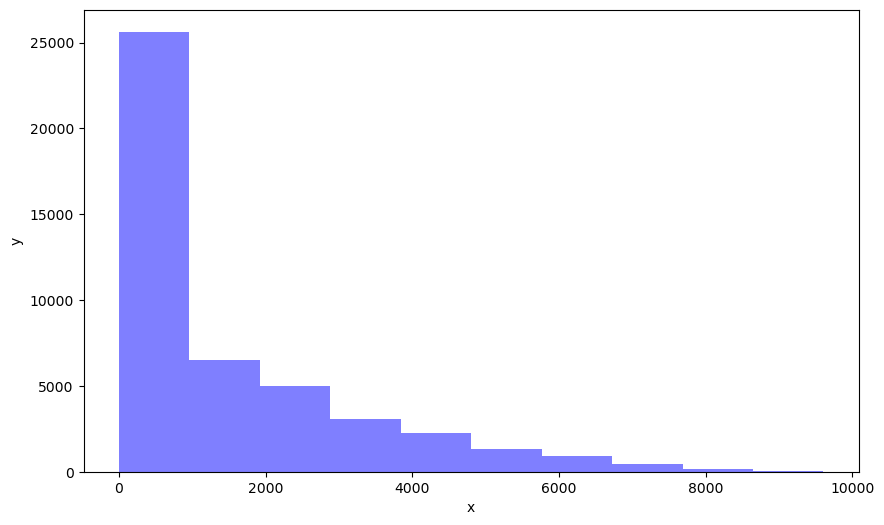

In [220]:
plt.figure(figsize=(10,6))
plt.hist(edades2004hist, alpha=0.5, color='blue') # por default, 10 bins
plt.xlabel("x")
plt.ylabel('y')
plt.show()

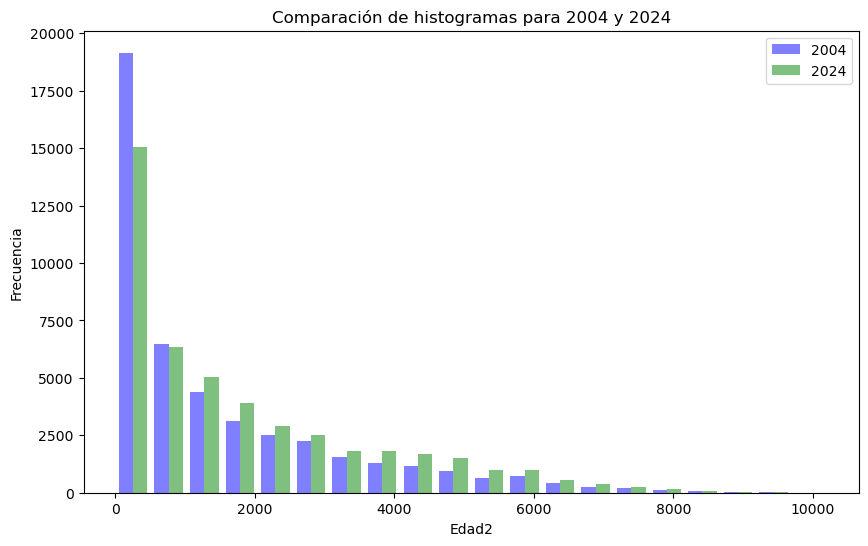

In [234]:
edad_2004 = edad2[edad2['año'] == 2004.0]['edad2']
edad_2024 = edad2[edad2['año'] == 2024.0]['edad2']

plt.figure(figsize=(10,6))
plt.hist([edad_2004, edad_2024],bins=20, alpha=0.5, color=['blue', 'green'], label=['2004', '2024'])
plt.xlabel('Edad2')
plt.ylabel('Frecuencia')
plt.title('Comparación de histogramas para 2004 y 2024')
plt.legend()
plt.show()
#no tiene mucho sentido gráficar las edades al cuadrado, aparte de que es poco entendible a simple vista

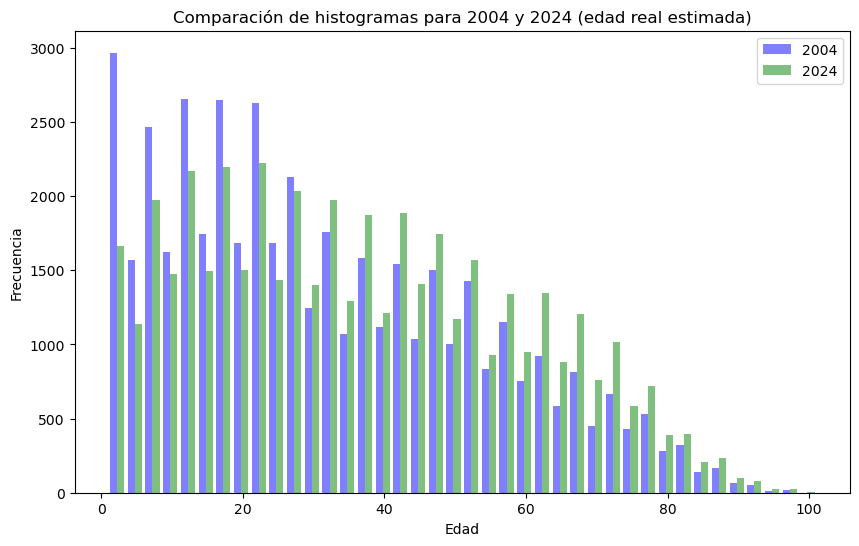

In [236]:
edad_2004 = np.sqrt(edad2[edad2['año'] == 2004.0]['edad2'])
edad_2024 = np.sqrt(edad2[edad2['año'] == 2024.0]['edad2']) #np.sqrt nos da la raiz cuadrada de la columna edad

plt.figure(figsize=(10,6))
plt.hist([edad_2004, edad_2024],bins=40, alpha=0.5, color=['blue', 'green'], label=['2004', '2024'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Comparación de histogramas para 2004 y 2024 (edad real estimada)')
plt.legend()
plt.show()